##### Question 5
What are the characteristics of rumour-creating users, and are they different to normal users?

Get user data

In [1]:
import json
import collections
from pyecharts.charts import Bar, Line
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
covid_labels = json.load(open('../covid_prediction.json'))
rumour_users_all = {}
nonrumour_users_all = {}

for key in covid_labels.keys():
    user = {}
    tweet_id = covid_labels[key]['id']
    tweet_object = json.load(open('../../project-data/covid-data/' + tweet_id + '.json'))
    user['tweet_id'] = tweet_id
    user['user_object'] = tweet_object["user"]
    if covid_labels[key]['prediction'] == 1:
        rumour_users_all[key] = user
    else:
        nonrumour_users_all[key] = user
    

In [84]:
rumour_users = {}
nonrumour_users = {}

for k in rumour_users_all.keys():
    id = rumour_users_all[k]['user_object']['id']
    if not id in rumour_users:
        user = {}
        user['id'] = id
        user['user_object'] = rumour_users_all[k]['user_object']
        user['tweet_count'] = 1
        rumour_users[id] = user
    else:
        rumour_users[id]['tweet_count'] += 1

for k in nonrumour_users_all.keys():
    id = nonrumour_users_all[k]['user_object']['id']
    if not id in nonrumour_users:
        user = {}
        user['id'] = id
        user['user_object'] = nonrumour_users_all[k]['user_object']
        user['tweet_count'] = 1
        nonrumour_users[id] = user
    else:
        nonrumour_users[id]['tweet_count'] += 1

In [85]:
with open('./rumour_users.json', 'w') as f:
    json.dump(rumour_users, f)
with open('./nonrumour_users.json', 'w') as f:
    json.dump(nonrumour_users, f)

In [2]:
rumour_users = json.load(open('./data/rumour_users.json'))
nonrumour_users = json.load(open('./data/nonrumour_users.json'))

In [3]:
def compare_in_charts(x, y_rumour, y_non_rumour):
    bar = Bar()
    bar.add_xaxis(x)
    if not y_non_rumour:
        bar.add_yaxis("counts", y_rumour)
        return bar
    bar.add_yaxis("rumour user", y_rumour)
    bar.add_yaxis("nonrumour user", y_non_rumour)

    return bar

tweet number that a user sent

In [35]:
rumour_num = collections.defaultdict(int)
nonrumour_num = collections.defaultdict(int)

for k in rumour_users.keys():
    rumour_num[rumour_users[k]['tweet_count']] += 1
for k in nonrumour_users.keys():
    nonrumour_num[nonrumour_users[k]['tweet_count']] += 1

rumour_num = np.array(sorted(rumour_num.items(), key=lambda x: x[0]))
nonrumour_num = np.array(sorted(nonrumour_num.items(), key=lambda x: x[0]))

compare_in_charts(rumour_num[:,0].tolist()[:10],
                  list(map(lambda x:round(x/len(rumour_users), 2), rumour_num[:,1].tolist()))[:10],
                  list(map(lambda x:round(x/len(nonrumour_users), 2), nonrumour_num[:,1].tolist()))[:10]).render_notebook()


if user is verified

In [5]:
rumour_verified_user_count = 0
nonrumour_verified_user_count = 0

for k in rumour_users.keys():
    if rumour_users[k]['user_object']['verified']:
        rumour_verified_user_count += 1

for k in nonrumour_users.keys():
    if nonrumour_users[k]['user_object']['verified']:
        nonrumour_verified_user_count += 1
        
compare_in_charts(['verified', 'not verified'], 
                  [rumour_verified_user_count / len(rumour_users), (len(rumour_users) - rumour_verified_user_count)/len(rumour_users)],
                  [nonrumour_verified_user_count / len(nonrumour_users), (len(nonrumour_users) - nonrumour_verified_user_count) / len(nonrumour_users)]).render_notebook()

user followers number

rumour user with highest follower num:       813286
nonrumour user with highest follower num:    813286
rumour user average follower num:       1625101.7631975866
nonrumour user average follower num:    948796.6609544868


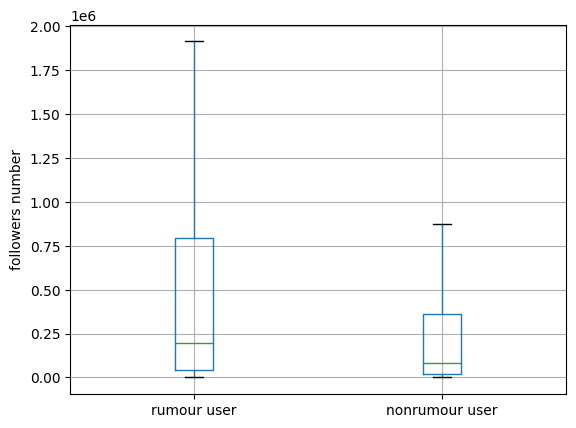

In [25]:
rumour_user_follower_num = []
nonrumour_user_follower_num = []

rumour_top_follower_num = 0
rumour_top_user_id = 0
nonrumour_top_follower_num = 0
nonrumour_top_user_id = 0


for k in rumour_users.keys():
    user_follower_num = rumour_users[k]['user_object']['followers_count']
    rumour_user_follower_num.append(user_follower_num)
    if user_follower_num > rumour_top_follower_num:
        rumour_top_follower_num = user_follower_num
        rumour_top_user_id = k

for k in nonrumour_users.keys():
    user_follower_num = nonrumour_users[k]['user_object']['followers_count']
    nonrumour_user_follower_num.append(user_follower_num)
    if user_follower_num > nonrumour_top_follower_num:
        nonrumour_top_follower_num = user_follower_num
        nonrumour_top_user_id = k

print("rumour user with highest follower num:       " + rumour_top_user_id)
print("nonrumour user with highest follower num:    " + nonrumour_top_user_id)

print("rumour user average follower num:       " + str(sum(rumour_user_follower_num)/len(rumour_users)))
print("nonrumour user average follower num:    " + str(sum(nonrumour_user_follower_num)/len(nonrumour_users)))

# box plot
s_rumour1 = pd.Series(rumour_user_follower_num)
s_nonrumour1 = pd.Series(nonrumour_user_follower_num)
data1 = pd.DataFrame({"rumour user": s_rumour1, "nonrumour user": s_nonrumour1})
data1.boxplot(showfliers=False)
plt.ylabel("followers number")
plt.show()

user friends number

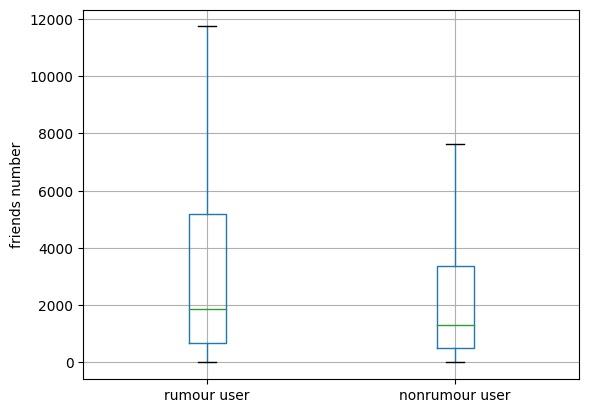

In [26]:
rumour_user_friend_num = []
nonrumour_user_friend_num = []

for k in rumour_users.keys():
    user_friend_num = rumour_users[k]['user_object']['friends_count']
    rumour_user_friend_num.append(user_friend_num)

for k in nonrumour_users.keys():
    user_friend_num = nonrumour_users[k]['user_object']['friends_count']
    nonrumour_user_friend_num.append(user_friend_num)

# box plot
s_rumour2 = pd.Series(rumour_user_friend_num)
s_nonrumour2 = pd.Series(nonrumour_user_friend_num)
data2 = pd.DataFrame({"rumour user": s_rumour2, "nonrumour user": s_nonrumour2})
data2.boxplot(showfliers=False)
plt.ylabel("friends number")
plt.show()

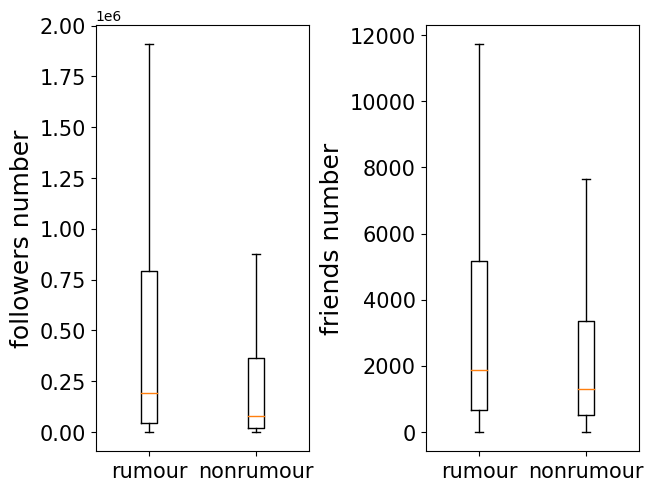

In [73]:
# combine the two box plot
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

ax1.boxplot([s_rumour1,s_nonrumour1], showfliers=False, labels=("rumour","nonrumour"))
ax1.set_ylabel("followers number", fontsize=18)
ax1.tick_params(labelsize=15)
ax2.boxplot([s_rumour2,s_nonrumour2], showfliers=False, labels=("rumour","nonrumour"))
ax2.set_ylabel("friends number", fontsize=18)
ax2.tick_params(labelsize=15)

pure rumour/nonrumour user

In [49]:
both_rumour_and_nonrumour_user = {}
for key in nonrumour_users.keys():
    if key in rumour_users:
        count = {}
        count['rumour_count'] = rumour_users[key]['tweet_count']
        count['nonrumour_count'] = nonrumour_users[key]['tweet_count']
        count['rumour_proportion'] = round(rumour_users[key]['tweet_count'] / (nonrumour_users[key]['tweet_count'] + rumour_users[key]['tweet_count']),1) 
        both_rumour_and_nonrumour_user[key] = count

rumour_proportions = collections.defaultdict(int)
for key in both_rumour_and_nonrumour_user.keys():
    rumour_proportions[both_rumour_and_nonrumour_user[key]['rumour_proportion']] += 1

rumour_proportions[1.0] = len(rumour_users) - len(both_rumour_and_nonrumour_user)
rumour_proportions = sorted(rumour_proportions.items(), key=lambda x: x[0])

print('pure rumour user proportion: ' + str(((len(rumour_users) - len(both_rumour_and_nonrumour_user))/len(rumour_users))))
print('pure nonrumour user proportion: ' + str(((len(nonrumour_users) - len(both_rumour_and_nonrumour_user))/len(nonrumour_users))))

compare_in_charts([x for x,_ in rumour_proportions], 
                  [y for _,y in rumour_proportions],
                  0).render_notebook()


pure rumour user proportion: 0.45098039215686275
pure nonrumour user proportion: 0.8658559056569007
